In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

#Python Library to Access Spotify API
#Spotify API uses XML, Spotipy Allows us to use Python
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Credentials for Using Spotify API
from keys import client_id
from keys import client_secret

#Spotipy Function to Authenticate 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [75]:
#Get List of Playlists for Specified User

#(MANUAL INPUT) Enter Specified User
user="spotify"

playlist_names=[]
playlist_ids=[]

#Generates Response for Each Playlist for a Given User and Displays
#Stores Playlist IDs and Names in Tuples
playlists = sp.user_playlists(user)
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
        playlist_names.append(playlist['name'])
        playlist_ids.append(playlist['id'])
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None
    break

   1 spotify:user:spotify:playlist:37i9dQZF1DXcBWIGoYBM5M Today's Top Hits
   2 spotify:user:spotify:playlist:37i9dQZF1DX0XUsuxWHRQd RapCaviar
   3 spotify:user:spotify:playlist:37i9dQZF1DX4dyzvuaRJ0n mint
   4 spotify:user:spotify:playlist:37i9dQZF1DX4SBhb3fqCJd Are & Be
   5 spotify:user:spotify:playlist:37i9dQZF1DXcF6B6QPhFDv Rock This
   6 spotify:user:spotify:playlist:37i9dQZF1DX1lVhptIYRda Hot Country
   7 spotify:user:spotify:playlist:37i9dQZF1DX10zKzsJ2jva ¡Viva Latino!
   8 spotify:user:spotify:playlist:37i9dQZF1DX4JAvHpjipBk New Music Friday
   9 spotify:user:spotify:playlist:37i9dQZF1DX4E3UdUs7fUx Afternoon Acoustic
  10 spotify:user:spotify:playlist:37i9dQZF1DX4sWSpwq3LiO Peaceful Piano
  11 spotify:user:spotify:playlist:37i9dQZF1DWYV7OOaGhoH0 Roots Rising
  12 spotify:user:spotify:playlist:5JdIoXkjfuyWmDdDnznmq1 Lost In Austin: Country Music from SXSW
  13 spotify:user:spotify:playlist:37i9dQZF1DX5PuwKY2VZBZ SXSW: HipHopUpNext
  14 spotify:user:spotify:playlist:37i9dQZF1DW

In [118]:
#(MANUAL INPUT) Enter Number from Response above to Select Playlist to Analyze
playlist_number=3

#Sets PLaylist_id Variable to a Value Based on Number Selected
playlist_id=playlist_ids[playlist_number-1]

track_ids=[]
track_names=[]

#Spotipy Function to Retreive Tracklist for a User's Playlist
tracks = sp.user_playlist_tracks(user, playlist_id, limit=50)

for i in range(len(tracks['items'])):
    print(" ID: " + tracks['items'][i]['track']['id'] + ": " + tracks['items'][i]['track']['name'])
    track_ids.append(tracks['items'][i]['track']['id'])
    track_names.append(tracks['items'][i]['track']['name'])
    


 ID: 7gq9Mo03Zr417T2C5sgR03: Don’t Tell Me
 ID: 0M0FvSNRZmDz0Z769rewlI: Fire In My Soul
 ID: 2QOSMLaEJkkeezSMZ75yB8: Body
 ID: 05Gqos5iV5LkjGcxmBV9C8: Feel My Needs (Turn Around)
 ID: 6lXPxNJVBoIRUitMJZw64Y: Drive (feat. Delilah Montagu)
 ID: 05LvE6ySn6hEcHdAJ7N19z: Losing It
 ID: 4ut5G4rgB1ClpMTMfjoIuy: High On Life (feat. Bonn)
 ID: 4CbUxjNBBkRnoo7MzjUFP9: Saga
 ID: 6EXl6ZF6rXm6qCsKeizJ1b: Grapevine
 ID: 6TR0FGw4zhlGbQALN065AI: Breathe (feat. Jem Cooke)
 ID: 79ep1XDpYKg0goDd3g5uPT: Neon Sky
 ID: 45Lu4PnbPH7fARZ82nMS3P: Wild Wild Son - Club Mix
 ID: 5sdb5pMhcK44SSLsj1moUh: I Found You (with Calvin Harris)
 ID: 7g2WfNLkwj6QeYmXleHUvi: Nobody Else
 ID: 5RugEn59RTnWE4IM4uBaC9: Up All Night
 ID: 5ElvxQOgTTUTjVfa1uhhFv: So Real (Warriors)
 ID: 1rCcsYnmqbMYdkG7kS9GC5: Speechless (feat. Erika Sirola)
 ID: 7rEOUR7AmXcgd32WG5duJh: Bvulgari
 ID: 4M8x1TR36VMQMFMbGCdoyA: Back & Forth
 ID: 4gxukDJiwApNEgVIh4pHgT: WOW
 ID: 31WJRcrBGMLG6rAtVPMldv: Twilight vs Breathe (feat. HALIENE & Matthew Steeper

In [119]:
#Spotipy Function to Retreive Audio Features for a Set of Track IDs
#May Receive Response for a Maximum of 50 Tracks at a Time 
audio_features=sp.audio_features(track_ids)

In [120]:
#Populates Tuples with Values for Audio Features

danceability=[]
energy=[]
speechiness=[]
acousticness=[]
instrumentalness=[]
liveness=[]
valence=[]
tempo=[]

for i in range(len(audio_features)):
    danceability.append(audio_features[i]['danceability'])
    energy.append(audio_features[i]['energy'])
    speechiness.append(audio_features[i]['speechiness'])
    acousticness.append(audio_features[i]['acousticness'])
    instrumentalness.append(audio_features[i]['instrumentalness'])
    liveness.append(audio_features[i]['liveness'])
    valence.append(audio_features[i]['valence'])
    tempo.append(audio_features[i]['tempo'])
    
    

In [126]:
#DataFrame for Track Audio Features
tracks_df=pd.DataFrame(track_ids)

for track in range(len(tracks_df)):
    #tracks_df["Track ID"]=track_ids
    tracks_df["Name"]=track_names
    tracks_df["Energy"]=energy
    tracks_df["Danceability"]=danceability
    tracks_df["Speechiness"]=speechiness
    tracks_df["Acousticness"]=acousticness
    tracks_df["Instrumentalness"]=instrumentalness
    tracks_df["Liveness"]=liveness
    tracks_df["Valence"]=valence
    tracks_df["Tempo"]=tempo
    
tracks_df.head()

,0,Name,Energy,Danceability,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,7gq9Mo03Zr417T2C5sgR03,Don’t Tell Me,0.785,0.597,0.0400,0.11300,0.000000,0.3360,0.575,126.002
1,0M0FvSNRZmDz0Z769rewlI,Fire In My Soul,0.977,0.592,0.3120,0.20600,0.000103,0.0703,0.496,126.178
2,2QOSMLaEJkkeezSMZ75yB8,Body,0.764,0.752,0.0380,0.04760,0.000094,0.0543,0.582,121.958
3,05Gqos5iV5LkjGcxmBV9C8,Feel My Needs (Turn Around),0.848,0.695,0.0506,0.00916,0.109000,0.1200,0.797,122.028
4,6lXPxNJVBoIRUitMJZw64Y,Drive (feat. Delilah Montagu),0.829,0.711,0.0370,0.00163,0.012500,0.0809,0.435,118.021


In [122]:
#Standard Deviation for Audio Properties
sigma1=np.std(energy, axis=None, dtype=None, out=None, ddof=0,)
sigma2=np.std(danceability, axis=None, dtype=None, out=None, ddof=0,)
sigma3=np.std(speechiness, axis=None, dtype=None, out=None, ddof=0,)
sigma4=np.std(acousticness, axis=None, dtype=None, out=None, ddof=0,)
sigma5=np.std(instrumentalness, axis=None, dtype=None, out=None, ddof=0,)
sigma6=np.std(valence, axis=None, dtype=None, out=None, ddof=0,)

#Mean Value for Audio Properties
mu1=np.mean(energy)
mu2=np.mean(danceability)
mu3=np.mean(speechiness)
mu4=np.mean(acousticness)
mu5=np.mean(instrumentalness)
mu6=np.mean(valence)


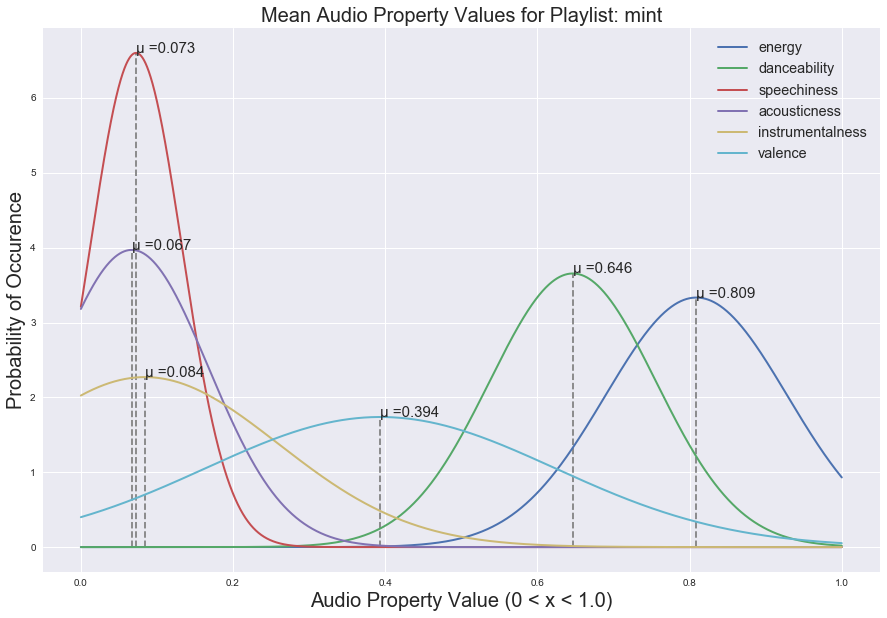

In [128]:
#Plot A Probability Density Function for Audio Values

#Set The Style for Plot
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 10)

#Generates A Set of Evenly Spaced X Values to use as a domain for generating the curves for the distributions
x = np.linspace(0, 1, 5000)

#Probability Density Function f(x|mu,var)
y1 = (1 / (np.sqrt(2 * np.pi * np.power(sigma1, 2)))) * \
    (np.power(np.e, -(np.power((x - mu1), 2) / (2 * np.power(sigma1, 2)))))

y2 = (1 / (np.sqrt(2 * np.pi * np.power(sigma2, 2)))) * \
    (np.power(np.e, -(np.power((x - mu2), 2) / (2 * np.power(sigma2, 2)))))

y3 = (1 / (np.sqrt(2 * np.pi * np.power(sigma3, 2)))) * \
    (np.power(np.e, -(np.power((x - mu3), 2) / (2 * np.power(sigma3, 2)))))

y4 = (1 / (np.sqrt(2 * np.pi * np.power(sigma4, 2)))) * \
    (np.power(np.e, -(np.power((x - mu4), 2) / (2 * np.power(sigma4, 2)))))

y5 = (1 / (np.sqrt(2 * np.pi * np.power(sigma5, 2)))) * \
    (np.power(np.e, -(np.power((x - mu5), 2) / (2 * np.power(sigma5, 2)))))

y6 = (1 / (np.sqrt(2 * np.pi * np.power(sigma6, 2)))) * \
    (np.power(np.e, -(np.power((x - mu6), 2) / (2 * np.power(sigma6, 2)))))


energy_plot, =           plt.plot(x,y1, label="energy", linewidth=2)
danceability_plot, =     plt.plot(x,y2, label="danceability", linewidth=2)
speechiness_plot, =      plt.plot(x,y3, label="speechiness", linewidth=2)
acousticness_plot, =     plt.plot(x,y4, label="acousticness", linewidth=2)
instrumentalness_plot, = plt.plot(x,y5, label="instrumentalness", linewidth=2)
valence_plot, =          plt.plot(x,y6, label="valence", linewidth=2)

plt.vlines(mu1, 0, np.max(y1), colors='grey', linestyles='dashed', label='', )
plt.vlines(mu2, 0, np.max(y2), colors='grey', linestyles='dashed', label='', )
plt.vlines(mu3, 0, np.max(y3), colors='grey', linestyles='dashed', label='', )
plt.vlines(mu4, 0, np.max(y4), colors='grey', linestyles='dashed', label='', )
plt.vlines(mu5, 0, np.max(y5), colors='grey', linestyles='dashed', label='', )
plt.vlines(mu6, 0, np.max(y6), colors='grey', linestyles='dashed', label='', )

plt.annotate(u'\u03bc =%.3f'%mu1, xy=(mu1, np.max(y1)), fontsize=15)
plt.annotate(u'\u03bc =%.3f'%mu2, xy=(mu2, np.max(y2)), fontsize=15)
plt.annotate(u'\u03bc =%.3f'%mu3, xy=(mu3, np.max(y3)), fontsize=15)
plt.annotate(u'\u03bc =%.3f'%mu4, xy=(mu4, np.max(y4)), fontsize=15)
plt.annotate(u'\u03bc =%.3f'%mu5, xy=(mu5, np.max(y5)), fontsize=15)
plt.annotate(u'\u03bc =%.3f'%mu6, xy=(mu6, np.max(y6)), fontsize=15)

plt.title(f"Mean Audio Property Values for Playlist: " +playlist_names[playlist_number-1], fontsize=20)
plt.xlabel("Audio Property Value (0 < x < 1.0)", fontsize=20)
plt.ylabel("Probability of Occurence", fontsize=20)
plt.legend(fontsize='x-large')